## Loan Approval Prediction

In [1]:
## import the pandas and numpy library
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
## Import and read the first five records of the dataset
data_set = pd.read_csv("LoanDataset.csv")
data_set.head()

id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                         N                          14            0  
1                         N                           2            0  
2                         N                          10            0  
3                         N                           5            0  
4                         N                           3            0

In [3]:
## check the information about dataset

In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
## check the value counts of the target variable

In [6]:
data_set['loan_status'].value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

In [7]:
## Get the summary statistics of the dataset

In [8]:
data_set.describe()

id    person_age  person_income  person_emp_length  \
count  58645.000000  58645.000000   5.864500e+04       58645.000000   
mean   29322.000000     27.550857   6.404617e+04           4.701015   
std    16929.497605      6.033216   3.793111e+04           3.959784   
min        0.000000     20.000000   4.200000e+03           0.000000   
25%    14661.000000     23.000000   4.200000e+04           2.000000   
50%    29322.000000     26.000000   5.800000e+04           4.000000   
75%    43983.000000     30.000000   7.560000e+04           7.000000   
max    58644.000000    123.000000   1.900000e+06         123.000000   

          loan_amnt  loan_int_rate  loan_percent_income  \
count  58645.000000   58645.000000         58645.000000   
mean    9217.556518      10.677874             0.159238   
std     5563.807384       3.034697             0.091692   
min      500.000000       5.420000             0.000000   
25%     5000.000000       7.880000             0.090000   
50%     8000.000000      10.750000             0.140000   
75%    12000.000000      12.990000             0.210000   
max    35000.000000      23.220000             0.830000   

       cb_person_cred_hist_length   loan_status  
count                58645.000000  58645.000000  
mean                     5.813556      0.142382  
std                      4.029196      0.349445  
min                      2.000000      0.000000  
25%                      3.000000      0.000000  
50%                      4.000000      0.000000  
75%                      8.000000      0.000000  
max                     30.000000      1.000000

In [9]:
## split the whole dataset into the training and testing set

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_set, test_size=0.2, random_state=42)
train_set.head()

id  person_age  person_income person_home_ownership  \
14337  14337          36          50000                  RENT   
17117  17117          27          43200                  RENT   
32590  32590          25          70000              MORTGAGE   
55811  55811          39          75000              MORTGAGE   
40120  40120          22          45600                  RENT   

       person_emp_length        loan_intent loan_grade  loan_amnt  \
14337                0.0    HOMEIMPROVEMENT          C       7200   
17117                3.0  DEBTCONSOLIDATION          C       5000   
32590                0.0          EDUCATION          A       8000   
55811                2.0  DEBTCONSOLIDATION          A      15000   
40120                5.0            MEDICAL          A       4000   

       loan_int_rate  loan_percent_income cb_person_default_on_file  \
14337          13.85                 0.14                         Y   
17117          11.66                 0.12                         Y   
32590           7.88                 0.11                         N   
55811           6.54                 0.20                         N   
40120           7.66                 0.09                         N   

       cb_person_cred_hist_length  loan_status  
14337                          15            0  
17117                           9            0  
32590                           3            0  
55811                          11            0  
40120                           2            0

In [11]:
test_set.head()

id  person_age  person_income person_home_ownership  \
4657    4657          23          40000                  RENT   
56440  56440          25          60000              MORTGAGE   
42117  42117          32          66300                  RENT   
10849  10849          22          30000                  RENT   
39395  39395          27          60000                  RENT   

       person_emp_length        loan_intent loan_grade  loan_amnt  \
4657                 0.0            MEDICAL          A       3700   
56440                9.0    HOMEIMPROVEMENT          A       5000   
42117                0.0            MEDICAL          B      20000   
10849                0.0  DEBTCONSOLIDATION          B       5000   
39395                1.0            MEDICAL          B       7000   

       loan_int_rate  loan_percent_income cb_person_default_on_file  \
4657            8.00                 0.09                         N   
56440           8.59                 0.08                         N   
42117          12.53                 0.26                         N   
10849          10.59                 0.17                         N   
39395          12.21                 0.12                         N   

       cb_person_cred_hist_length  loan_status  
4657                            4            0  
56440                           4            0  
42117                           6            1  
10849                           2            0  
39395                          10            0

## Explotary Data Analysis (EDA) for training dataset

In [12]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46916 entries, 14337 to 56422
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          46916 non-null  int64  
 1   person_age                  46916 non-null  int64  
 2   person_income               46916 non-null  int64  
 3   person_home_ownership       46916 non-null  object 
 4   person_emp_length           46916 non-null  float64
 5   loan_intent                 46916 non-null  object 
 6   loan_grade                  46916 non-null  object 
 7   loan_amnt                   46916 non-null  int64  
 8   loan_int_rate               46916 non-null  float64
 9   loan_percent_income         46916 non-null  float64
 10  cb_person_default_on_file   46916 non-null  object 
 11  cb_person_cred_hist_length  46916 non-null  int64  
 12  loan_status                 46916 non-null  int64  
dtypes: float64(3), int64(6), object(

In [13]:
train_set['person_home_ownership'].value_counts()

person_home_ownership
RENT        24475
MORTGAGE    19857
OWN          2515
OTHER          69
Name: count, dtype: int64

In [14]:
train_set['loan_intent'].value_counts()

loan_intent
EDUCATION            9794
MEDICAL              8755
PERSONAL             8024
VENTURE              7945
DEBTCONSOLIDATION    7340
HOMEIMPROVEMENT      5058
Name: count, dtype: int64

In [15]:
train_set['loan_grade'].value_counts()

loan_grade
A    16769
B    16293
C     8859
D     4019
E      827
F      123
G       26
Name: count, dtype: int64

In [16]:
train_set['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    39900
Y     7016
Name: count, dtype: int64

In [17]:
## Data Preprcoessing

In [18]:
## when we consider the training set you can see categorical text oriented variables are there. So the, when we give that kind of features for model training,
## we have to convert into numeric values

In [19]:
train_set_new=train_set.replace({'person_home_ownership' :{'RENT':0, 'MORTGAGE':2, 'OWN':3,'OTHER':4}, 
                   'loan_intent':{'EDUCATION':1, 'MEDICAL':2,'PERSONAL':3, 'VENTURE':4,'DEBTCONSOLIDATION':5, 'HOMEIMPROVEMENT':6},
                   'loan_grade':{'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}, 'cb_person_default_on_file':{'N':0,'Y':1}})
train_set_new.head()

id  person_age  person_income  person_home_ownership  \
14337  14337          36          50000                      0   
17117  17117          27          43200                      0   
32590  32590          25          70000                      2   
55811  55811          39          75000                      2   
40120  40120          22          45600                      0   

       person_emp_length  loan_intent  loan_grade  loan_amnt  loan_int_rate  \
14337                0.0            6           3       7200          13.85   
17117                3.0            5           3       5000          11.66   
32590                0.0            1           1       8000           7.88   
55811                2.0            5           1      15000           6.54   
40120                5.0            2           1       4000           7.66   

       loan_percent_income  cb_person_default_on_file  \
14337                 0.14                          1   
17117                 0.12                          1   
32590                 0.11                          0   
55811                 0.20                          0   
40120                 0.09                          0   

       cb_person_cred_hist_length  loan_status  
14337                          15            0  
17117                           9            0  
32590                           3            0  
55811                          11            0  
40120                           2            0

In [20]:
## Plot the training dataset based on loan_status  using scatterplots

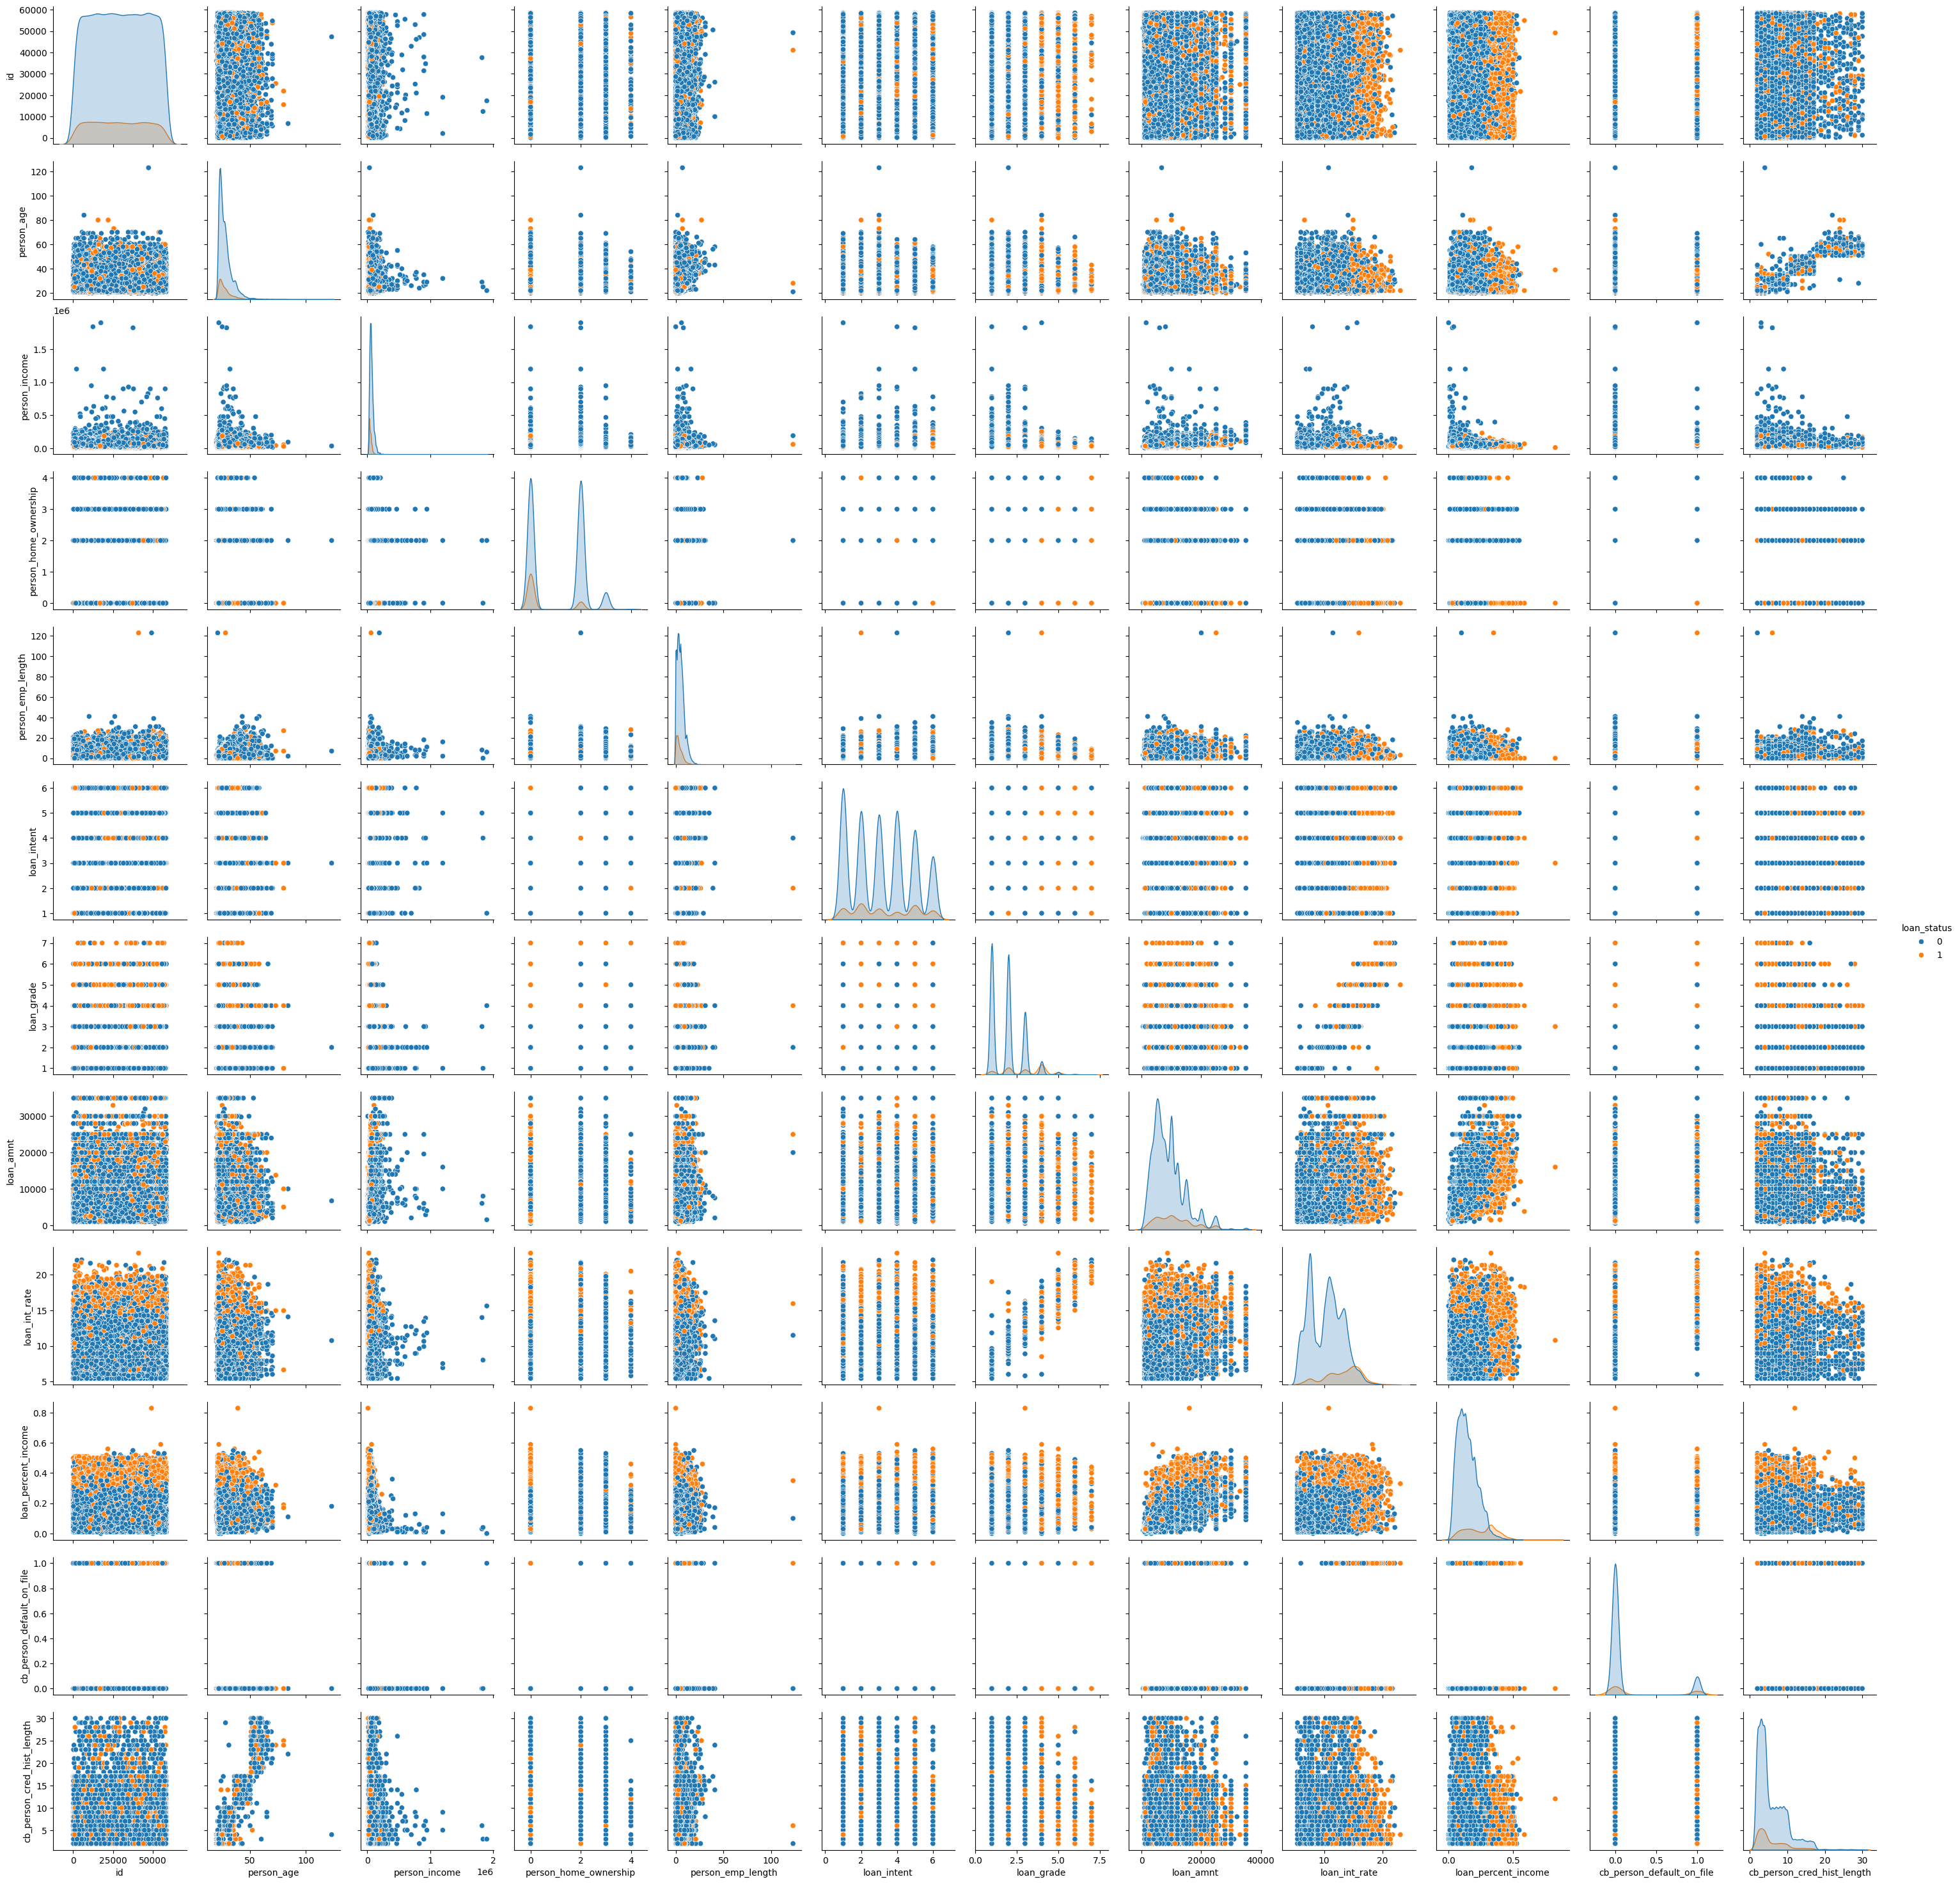

In [21]:
import seaborn as sns

sns.pairplot(train_set_new, hue="loan_status")

In [22]:
## check the correlational coefficiancy between dependent variable and independent variables

In [23]:
train_set_new_corr = train_set_new.corr()

In [24]:
train_set_new_corr

id  person_age  person_income  \
id                          1.000000    0.008112      -0.002233   
person_age                  0.008112    1.000000       0.099544   
person_income              -0.002233    0.099544       1.000000   
person_home_ownership       0.003234    0.048899       0.230446   
person_emp_length           0.007957    0.120555       0.165528   
loan_intent                -0.002718    0.099657       0.070819   
loan_grade                 -0.002056    0.018472      -0.055598   
loan_amnt                  -0.000066    0.052976       0.304899   
loan_int_rate              -0.003113    0.011268      -0.054421   
loan_percent_income        -0.001224   -0.030016      -0.276692   
cb_person_default_on_file  -0.003187    0.004587      -0.032513   
cb_person_cred_hist_length  0.006883    0.874622       0.080353   
loan_status                -0.009727   -0.000257      -0.166618   

                            person_home_ownership  person_emp_length  \
id                                       0.003234           0.007957   
person_age                               0.048899           0.120555   
person_income                            0.230446           0.165528   
person_home_ownership                    1.000000           0.270122   
person_emp_length                        0.270122           1.000000   
loan_intent                              0.057339           0.046744   
loan_grade                              -0.165453          -0.089171   
loan_amnt                                0.091191           0.094465   
loan_int_rate                           -0.181019          -0.099888   
loan_percent_income                     -0.129987          -0.067341   
cb_person_default_on_file               -0.086086          -0.051942   
cb_person_cred_hist_length               0.045481           0.101808   
loan_status                             -0.239421          -0.103577   

                            loan_intent  loan_grade  loan_amnt  loan_int_rate  \
id                            -0.002718   -0.002056  -0.000066      -0.003113   
person_age                     0.099657    0.018472   0.052976       0.011268   
person_income                  0.070819   -0.055598   0.304899      -0.054421   
person_home_ownership          0.057339   -0.165453   0.091191      -0.181019   
person_emp_length              0.046744   -0.089171   0.094465      -0.099888   
loan_intent                    1.000000    0.014882   0.046855       0.005822   
loan_grade                     0.014882    1.000000   0.115841       0.936384   
loan_amnt                      0.046855    0.115841   1.000000       0.116053   
loan_int_rate                  0.005822    0.936384   0.116053       1.000000   
loan_percent_income           -0.016209    0.155273   0.648558       0.154129   
cb_person_default_on_file      0.006633    0.551398   0.023361       0.503069   
cb_person_cred_hist_length     0.085111    0.014889   0.046933       0.010453   
loan_status                    0.037991    0.385973   0.147342       0.339391   

                            loan_percent_income  cb_person_default_on_file  \
id                                    -0.001224                  -0.003187   
person_age                            -0.030016                   0.004587   
person_income                         -0.276692                  -0.032513   
person_home_ownership                 -0.129987                  -0.086086   
person_emp_length                     -0.067341                  -0.051942   
loan_intent                           -0.016209                   0.006633   
loan_grade                             0.155273                   0.551398   
loan_amnt                              0.648558                   0.023361   
loan_int_rate                          0.154129                   0.503069   
loan_percent_income                    1.000000                   0.045595   
cb_person_default_on_file              0.045595                   1.000000   
cb_person_cred_

In [25]:
## check the null values of the train_set_new

In [26]:
train_set_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46916 entries, 14337 to 56422
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          46916 non-null  int64  
 1   person_age                  46916 non-null  int64  
 2   person_income               46916 non-null  int64  
 3   person_home_ownership       46916 non-null  int64  
 4   person_emp_length           46916 non-null  float64
 5   loan_intent                 46916 non-null  int64  
 6   loan_grade                  46916 non-null  int64  
 7   loan_amnt                   46916 non-null  int64  
 8   loan_int_rate               46916 non-null  float64
 9   loan_percent_income         46916 non-null  float64
 10  cb_person_default_on_file   46916 non-null  int64  
 11  cb_person_cred_hist_length  46916 non-null  int64  
 12  loan_status                 46916 non-null  int64  
dtypes: float64(3), int64(10)
memory 

In [27]:
## seperate the independent variables and independent variables from train_set

In [28]:
X = train_set_new.iloc[:,0:12]
X.head()

id  person_age  person_income  person_home_ownership  \
14337  14337          36          50000                      0   
17117  17117          27          43200                      0   
32590  32590          25          70000                      2   
55811  55811          39          75000                      2   
40120  40120          22          45600                      0   

       person_emp_length  loan_intent  loan_grade  loan_amnt  loan_int_rate  \
14337                0.0            6           3       7200          13.85   
17117                3.0            5           3       5000          11.66   
32590                0.0            1           1       8000           7.88   
55811                2.0            5           1      15000           6.54   
40120                5.0            2           1       4000           7.66   

       loan_percent_income  cb_person_default_on_file  \
14337                 0.14                          1   
17117                 0.12                          1   
32590                 0.11                          0   
55811                 0.20                          0   
40120                 0.09                          0   

       cb_person_cred_hist_length  
14337                          15  
17117                           9  
32590                           3  
55811                          11  
40120                           2

In [78]:
y=train_set_new.iloc[:,12]
y.head()

14337    0
17117    0
32590    0
55811    0
40120    0
Name: loan_status, dtype: int64

## Split the training data into training and test set

In [97]:
from sklearn.model_selection import train_test_split

x_train_new, x_test_new,y_train_new, y_test_new = train_test_split(X,y, test_size=0.2, random_state=42)
x_train_new.head()

id  person_age  person_income  person_home_ownership  \
50332  50332          23          85000                      0   
38967  38967          28          60000                      0   
1439    1439          25         100000                      2   
55454  55454          25         102000                      2   
22161  22161          36          60000                      0   

       person_emp_length  loan_intent  loan_grade  loan_amnt  loan_int_rate  \
50332                7.0            2           2      16000          11.71   
38967                4.0            2           2       5000          11.48   
1439                 9.0            5           3      12000          13.23   
55454                9.0            3           3       6000          13.48   
22161                1.0            6           1      20000           7.88   

       loan_percent_income  cb_person_default_on_file  \
50332                 0.19                          0   
38967                 0.08                          0   
1439                  0.12                          1   
55454                 0.06                          0   
22161                 0.33                          0   

       cb_person_cred_hist_length  
50332                           3  
38967                           9  
1439                            2  
55454                           2  
22161                          13

In [98]:
x_test_new.head()

id  person_age  person_income  person_home_ownership  \
28875  28875          40          60000                      0   
40709  40709          39         175000                      0   
41083  41083          39          60000                      3   
2610    2610          34          50000                      2   
46690  46690          22          55000                      2   

       person_emp_length  loan_intent  loan_grade  loan_amnt  loan_int_rate  \
28875                6.0            3           3      12000          13.49   
40709                2.0            4           1      12000           7.49   
41083                9.0            1           3       9000          11.34   
2610                 0.0            6           2       2400          11.49   
46690                6.0            2           1       2000           7.68   

       loan_percent_income  cb_person_default_on_file  \
28875                 0.20                          0   
40709                 0.07                          0   
41083                 0.14                          1   
2610                  0.05                          0   
46690                 0.04                          0   

       cb_person_cred_hist_length  
28875                          16  
40709                          12  
41083                          11  
2610                            9  
46690                           2

## Model Selection

In [32]:
## DecisionTreeClassifier

In [99]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(x_train_new,y_train_new)

DecisionTreeClassifier()

In [100]:
DTC_pred= DTC.predict(x_test_new)
DTC_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:

DTC_accuracy = accuracy_score(y_test_new, DTC_pred)
DTC_accuracy

0.9138959931798807

In [102]:
DTC_confusion_matrix = confusion_matrix(y_test_new, DTC_pred)
DTC_confusion_matrix

array([[7625,  444],
       [ 364,  951]], dtype=int64)

In [103]:
DTC_classification_report = classification_report(y_test_new, DTC_pred)
print(DTC_classification_report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8069
           1       0.68      0.72      0.70      1315

    accuracy                           0.91      9384
   macro avg       0.82      0.83      0.83      9384
weighted avg       0.92      0.91      0.91      9384



In [38]:
## RandomForestClassifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=400, criterion="entropy", max_features=30)
RFC.fit(x_train_new, y_train_new)

RandomForestClassifier(criterion='entropy', max_features=30, n_estimators=400)

In [105]:
RFC_prediction = RFC.predict(x_test_new)
RFC_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
RFC_accuracy = accuracy_score(y_test_new,RFC_prediction)
RFC_accuracy

0.9510869565217391

In [108]:
RFC_confusion_matrix = confusion_matrix(y_test_new, RFC_prediction)
RFC_confusion_matrix

array([[7986,   83],
       [ 376,  939]], dtype=int64)

In [109]:
RFC_classification_report = classification_report(y_test_new,RFC_prediction)
print(RFC_classification_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8069
           1       0.92      0.71      0.80      1315

    accuracy                           0.95      9384
   macro avg       0.94      0.85      0.89      9384
weighted avg       0.95      0.95      0.95      9384



In [44]:
## Support vector Machione Classifier

In [45]:
from sklearn.svm import SVC

SVC = SVC()
SVC.fit(x_train_new, y_train_new)

SVC()

In [46]:
SVC_predictions = SVC.predict(x_test_new)
SVC_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
SVC_accuracy= accuracy_score(y_test_new, SVC_predictions)
SVC_accuracy

0.8598678601875532

In [48]:
SVC_confusion_matrix = confusion_matrix(y_test_new, SVC_predictions)
SVC_confusion_matrix

array([[8069,    0],
       [1315,    0]], dtype=int64)

In [49]:
SVC_classification_report = classification_report(y_test_new, SVC_predictions)
print(SVC_classification_report)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      8069
           1       0.00      0.00      0.00      1315

    accuracy                           0.86      9384
   macro avg       0.43      0.50      0.46      9384
weighted avg       0.74      0.86      0.80      9384



C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [50]:
from sklearn.neighbors import KNeighborsClassifier

kneighbor_model = KNeighborsClassifier(n_neighbors=200)
kneighbor_model.fit(x_train_new, y_train_new)

KNeighborsClassifier(n_neighbors=200)

In [51]:
kneighbor_model_prediction = kneighbor_model.predict(x_test_new)
kneighbor_model_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
kneighbor_model_accuracy = accuracy_score(y_test_new, kneighbor_model_prediction)
kneighbor_model_accuracy

0.8730818414322251

In [68]:
kneighbor_model_confusion_matrix = confusion_matrix(y_test_new, kneighbor_model_prediction)
kneighbor_model_confusion_matrix

array([[8029,   40],
       [1151,  164]], dtype=int64)

In [71]:
kneighbor_model_classification_report = classification_report(y_test_new, kneighbor_model_prediction)
print(kneighbor_model_classification_report)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      8069
           1       0.80      0.12      0.22      1315

    accuracy                           0.87      9384
   macro avg       0.84      0.56      0.57      9384
weighted avg       0.86      0.87      0.83      9384



In [110]:
DTC_accuracy

0.9138959931798807

In [111]:
RFC_accuracy

0.9510869565217391

In [112]:
SVC_accuracy

0.8598678601875532

In [113]:
kneighbor_model_accuracy

0.8730818414322251

In [72]:
## According to the above accuracies of the models random forest classifier is better model

## Explotary Data Analysis For test dataset

In [74]:
test_set.head()

id  person_age  person_income person_home_ownership  \
4657    4657          23          40000                  RENT   
56440  56440          25          60000              MORTGAGE   
42117  42117          32          66300                  RENT   
10849  10849          22          30000                  RENT   
39395  39395          27          60000                  RENT   

       person_emp_length        loan_intent loan_grade  loan_amnt  \
4657                 0.0            MEDICAL          A       3700   
56440                9.0    HOMEIMPROVEMENT          A       5000   
42117                0.0            MEDICAL          B      20000   
10849                0.0  DEBTCONSOLIDATION          B       5000   
39395                1.0            MEDICAL          B       7000   

       loan_int_rate  loan_percent_income cb_person_default_on_file  \
4657            8.00                 0.09                         N   
56440           8.59                 0.08                         N   
42117          12.53                 0.26                         N   
10849          10.59                 0.17                         N   
39395          12.21                 0.12                         N   

       cb_person_cred_hist_length  loan_status  
4657                            4            0  
56440                           4            0  
42117                           6            1  
10849                           2            0  
39395                          10            0

In [114]:
## data preprocessing and cleaning part

In [115]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11729 entries, 4657 to 23520
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          11729 non-null  int64  
 1   person_age                  11729 non-null  int64  
 2   person_income               11729 non-null  int64  
 3   person_home_ownership       11729 non-null  object 
 4   person_emp_length           11729 non-null  float64
 5   loan_intent                 11729 non-null  object 
 6   loan_grade                  11729 non-null  object 
 7   loan_amnt                   11729 non-null  int64  
 8   loan_int_rate               11729 non-null  float64
 9   loan_percent_income         11729 non-null  float64
 10  cb_person_default_on_file   11729 non-null  object 
 11  cb_person_cred_hist_length  11729 non-null  int64  
 12  loan_status                 11729 non-null  int64  
dtypes: float64(3), int64(6), object(4

In [116]:
test_set_new=test_set.replace({'person_home_ownership' :{'RENT':0, 'MORTGAGE':2, 'OWN':3,'OTHER':4}, 
                   'loan_intent':{'EDUCATION':1, 'MEDICAL':2,'PERSONAL':3, 'VENTURE':4,'DEBTCONSOLIDATION':5, 'HOMEIMPROVEMENT':6},
                   'loan_grade':{'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}, 'cb_person_default_on_file':{'N':0,'Y':1}})
test_set_new.head()

id  person_age  person_income  person_home_ownership  \
4657    4657          23          40000                      0   
56440  56440          25          60000                      2   
42117  42117          32          66300                      0   
10849  10849          22          30000                      0   
39395  39395          27          60000                      0   

       person_emp_length  loan_intent  loan_grade  loan_amnt  loan_int_rate  \
4657                 0.0            2           1       3700           8.00   
56440                9.0            6           1       5000           8.59   
42117                0.0            2           2      20000          12.53   
10849                0.0            5           2       5000          10.59   
39395                1.0            2           2       7000          12.21   

       loan_percent_income  cb_person_default_on_file  \
4657                  0.09                          0   
56440                 0.08                          0   
42117                 0.26                          0   
10849                 0.17                          0   
39395                 0.12                          0   

       cb_person_cred_hist_length  loan_status  
4657                            4            0  
56440                           4            0  
42117                           6            1  
10849                           2            0  
39395                          10            0

In [117]:
test_set_new = test_set_new.drop('loan_status', axis=1)
test_set_new.head()

id  person_age  person_income  person_home_ownership  \
4657    4657          23          40000                      0   
56440  56440          25          60000                      2   
42117  42117          32          66300                      0   
10849  10849          22          30000                      0   
39395  39395          27          60000                      0   

       person_emp_length  loan_intent  loan_grade  loan_amnt  loan_int_rate  \
4657                 0.0            2           1       3700           8.00   
56440                9.0            6           1       5000           8.59   
42117                0.0            2           2      20000          12.53   
10849                0.0            5           2       5000          10.59   
39395                1.0            2           2       7000          12.21   

       loan_percent_income  cb_person_default_on_file  \
4657                  0.09                          0   
56440                 0.08                          0   
42117                 0.26                          0   
10849                 0.17                          0   
39395                 0.12                          0   

       cb_person_cred_hist_length  
4657                            4  
56440                           4  
42117                           6  
10849                           2  
39395                          10

In [118]:
test_set_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11729 entries, 4657 to 23520
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          11729 non-null  int64  
 1   person_age                  11729 non-null  int64  
 2   person_income               11729 non-null  int64  
 3   person_home_ownership       11729 non-null  int64  
 4   person_emp_length           11729 non-null  float64
 5   loan_intent                 11729 non-null  int64  
 6   loan_grade                  11729 non-null  int64  
 7   loan_amnt                   11729 non-null  int64  
 8   loan_int_rate               11729 non-null  float64
 9   loan_percent_income         11729 non-null  float64
 10  cb_person_default_on_file   11729 non-null  int64  
 11  cb_person_cred_hist_length  11729 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.2 MB


In [121]:
## Making the predictions using test set

In [132]:
#	id	person_age	person_income	person_home_ownership	person_emp_length	loan_intent	loan_grade	loan_amnt	loan_int_rate	loan_percent_income	cb_person_default_on_file	cb_person_cred_hist_length
#	0	37	35000	RENT	0.0	EDUCATION	B	6000	11.49	0.17	N	14
#	id	person_age	person_income	person_home_ownership	person_emp_length	loan_intent	loan_grade	loan_amnt	loan_int_rate	loan_percent_income	cb_person_default_on_file	cb_person_cred_hist_length	loan_status
#11	10	30	78000	MORTGAGE	5.0	VENTURE	B	12800	10.59	0.17	N	5	0

sample_data = [[30,78000,2,5.0,4,2,12800,10.59,0.17,0,5,0]]

predictions  = RFC.predict(sample_data)
if predictions[0] ==0:
    print("Loan is not approved")
else:
    print("Loan is approved")

Loan is not approved


C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [134]:
#RFC_predict_proba = RFC.predict_proba(sample_data)
#RFC_predict_proba